In [1]:
import random
import numpy as np

import dataset
import taylor_spline

random.seed(0)
np.random.seed(0)

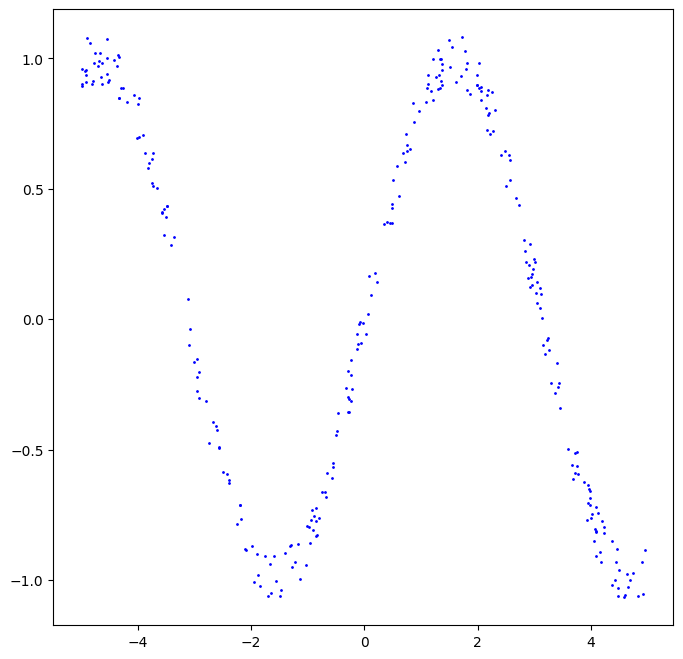

In [2]:
S = dataset.TrigonDataset()
S.sample(size=300, noise=0.1)
S.plot()

Fitness: -157.2237173845003


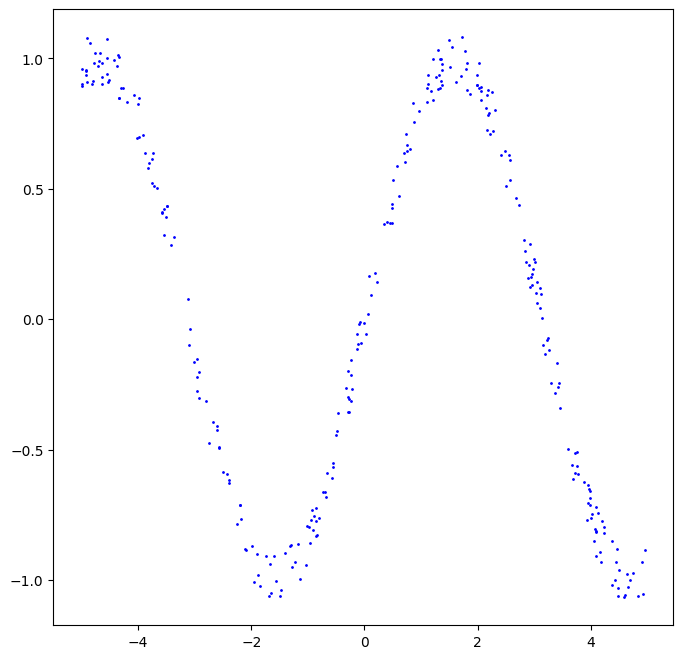

In [3]:
tspl = taylor_spline.TaylorSpline(0, 3)

print(f"Fitness: {tspl.fitness(S)}")
S.plot()
tspl.plot()

In [4]:
"""tspl.fit(S)

print(f"Fitness: {tspl.fitness(S)}")
S.plot()
tspl.plot()"""

'tspl.fit(S)\n\nprint(f"Fitness: {tspl.fitness(S)}")\nS.plot()\ntspl.plot()'

Stepsize = 3.3333333333333335; stepsize_2 = 1.6666666666666667; padding = 0.8
Fitting on x0 = -3.333333333333333 from -5.0 to -1.6666666666666663


c:\Users\Agostino\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=1) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


Fitting on x0 = -0.7999999999999998 from -2.466666666666667 to 0.8666666666666669
Fitting on x0 = 1.7333333333333334 from 0.06666666666666665 to 3.4000000000000004
Fitting on x0 = 4.266666666666667 from 2.5999999999999996 to 5.933333333333334


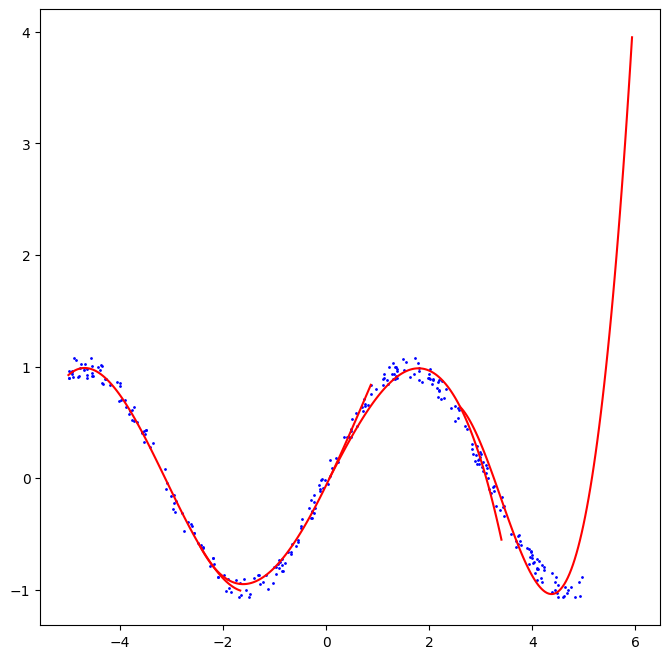

In [5]:
from matplotlib import pyplot as plt

tspline_conn = taylor_spline.TaylorSplineConnector(3)
tsplines = tspline_conn.fit(S)

S.plot()
for ts in tsplines:
    #print(f"Fitness: {ts.fitness(S)}")
    ts.plot(show=False)
plt.show()